In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("digit-recognizer/train.csv")


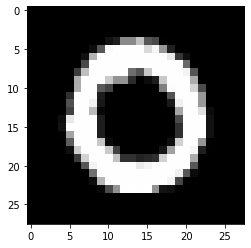

In [17]:
original_image = train_data.iloc[1]
image_1 = np.array(original_image.iloc[1:]).reshape(28,28)

plt.imshow(image_1,cmap='gist_gray')

Plot

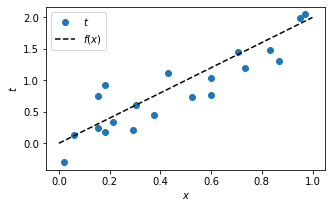

In [20]:
def f(x):
    return x*2
np.random.seed(42)
x = np.random.uniform(0, 1, 20)

# Create the targets t with some Gaussian noises
noise = np.random.normal(0, 0.3, size=x.shape[0])
t = f(x) + noise

# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

Find the Projection matrix B
and orthonormalize it

10.1 Problem setting

pssessess the data covariance matrix

$\begin{equation}
S = \frac{1}{N} \sum_{n=1}^{10} x_n x_n^T
\end{equation}$

And we assume there exists a low-dimensional compressed representation

$z_n = B^T x_n \in R^M$